## Add extension to find exectution time

In [1]:
%load_ext autotime

## Imports

In [45]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

time: 896 µs


## Define activation function

In [3]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

time: 1.09 ms


In [4]:
sigmoid(0.5)

0.6224593312018546

time: 84.8 ms


## Format Dataset

In [5]:
path_lr = Path("../data/logistic_regression/logistic_regression.txt")
features, labels = list(), list()
with open(path_lr, "r") as f:
    rows = f.read().split("\n")
for row in rows:
    if not row: continue
    columns = row.split("\t")
    features.append([1.0, float(columns[0]), float(columns[1])])
    labels.append(int(columns[-1]))
    
print(f"Features are : \n{features}")
print(f"Labels are : \n{labels}")

Features are : 
[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 

## Define gradient ascent

In [6]:
def gradient_ascent(features, labels, alpha=0.001, epochs=500):
    np_features = np.mat(features)
    np_labels = np.mat(labels).transpose()
    row, col = np.shape(np_features)
    weights = np.ones((col, 1))
    for epoch in range(epochs):
        pred = sigmoid(np_features * weights)
        error = np_labels - pred
        weights += alpha * np_features.transpose() * error
    return weights

time: 86.2 ms


In [7]:
gradient_ascent(features, labels)

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

time: 113 ms


## Plotting the decision boundary

In [8]:
updated_weights = gradient_ascent(features, labels)

time: 1.11 s


In [9]:
updated_weights

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

time: 264 ms


In [10]:
np_features = np.array(features)
rows, cols = np.shape(np_features)

time: 94.7 ms


In [11]:
f"There are {rows} data points"

'There are 100 data points'

time: 70.5 ms


In [12]:
np_features[0]
np_features[0, 1]

array([ 1.      , -0.017612, 14.053064])

-0.017612

time: 74.8 ms


In [13]:
x_coord1, y_coord1, x_coord2, y_coord2 = list(), list(), list(), list()

for index in range(rows):
    if labels[index] == 1:
        x_coord1.append(np_features[index, 1])
        y_coord1.append(np_features[index, 2])
    else:
        x_coord2.append(np_features[index, 1])
        y_coord2.append(np_features[index, 2])

time: 62.6 ms


Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

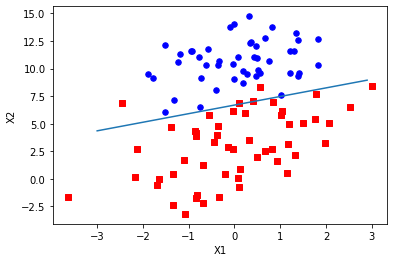

time: 848 ms


In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coord1, y_coord1, s=30, c='red', marker='s')
ax.scatter(x_coord2, y_coord2, s=30, c='blue')

x = np.arange(-3.0, 3.0, 0.1)
y = (-updated_weights[0] - updated_weights[1] * x) / updated_weights[2]
ax.plot(x, y)
plt.xlabel("X1"); plt.ylabel("X2")

The classification is pretty good. From the image, it appears that we’ll misclassify
only two to four data points.

## Stochastic gradient descent

The previous optimization algorithm, gradient ascent, uses the whole dataset on each
update. This was fine with 100 examples, but with billions of data points containing
thousands of features, it’s unnecessarily expensive in terms of computational resources. An alternative to this method is to update the weights using only one
instance at a time. This is known as stochastic gradient ascent.

In [15]:
def stochastic_gd(features, labels, alpha=0.01):
    m, n = np.shape(features)
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(features[i] * weights))
        error = labels[i] - h
        weights = weights + np.array((alpha * error * np.mat(features[i])))
    return weights

time: 1.84 ms


In [16]:
stochastic_gd(features, labels)

array([[ 1.01702007,  0.85914348, -0.36579921]])

time: 67.5 ms


## Plot for stochastic gradient ascent

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X2')

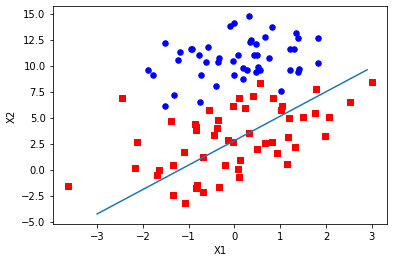

time: 303 ms


In [17]:
updated_weights = stochastic_gd(features, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_coord1, y_coord1, s=30, c='red', marker='s')
ax.scatter(x_coord2, y_coord2, s=30, c='blue')

x = np.arange(-3.0, 3.0, 0.1)
y = (-updated_weights[0, 0] - updated_weights[0, 1] * x) / updated_weights[0, 2]
ax.plot(x, y)
plt.xlabel("X1"); plt.ylabel("X2")

There are many misclassified values now.

## Lets change learning rate to address this problem

Lets decrease alpha as the number of epochs increases, and add a constant term to alpha such that it never touches zero. This improves the high frequency oscillations that happen in the dataset. We add the constant term because, even after large number of epochs, the new data should have some effect on the model.

Another improvement here is, we randomly select a value to update the weights, this will reduce the periodic variations that we see in the data.